<a href="https://colab.research.google.com/github/yashfirkedata/BitC-Prediction/blob/main/BitC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BitCoin Price Prediciton**

In [2]:
!wget https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv

--2024-07-13 14:54:12--  https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159278 (156K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 155.54K  --.-KB/s    in 0.03s   

2024-07-13 14:54:13 (4.61 MB/s) - ‘BTC-USD.csv’ saved [159278/159278]



In [3]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # setting Date as out as index
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-13,11813.126953,11841.957031,10908.479492,11392.378906,11392.378906,21042616384
2019-07-14,11381.020508,11451.204102,10234.576172,10256.058594,10256.058594,22486000001
2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207
2019-07-16,10896.653320,10996.632813,9448.106445,9477.641602,9477.641602,24151199070
2019-07-17,9471.213867,9963.134766,9163.134766,9693.802734,9693.802734,24569921549


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-07-13 to 2024-07-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [5]:
len(df)

1828

In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,56704.597656,58239.195313,56316.875000,58009.226563,58009.226563,27849512607
2024-07-10,58033.882813,59359.433594,57178.414063,57742.496094,57742.496094,26175260526
2024-07-11,57729.890625,59299.433594,57120.378906,57344.914063,57344.914063,28707803842
2024-07-12,57341.195313,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
2024-07-13,57908.738281,58191.808594,57800.246094,58087.300781,58087.300781,22515382272


In [7]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


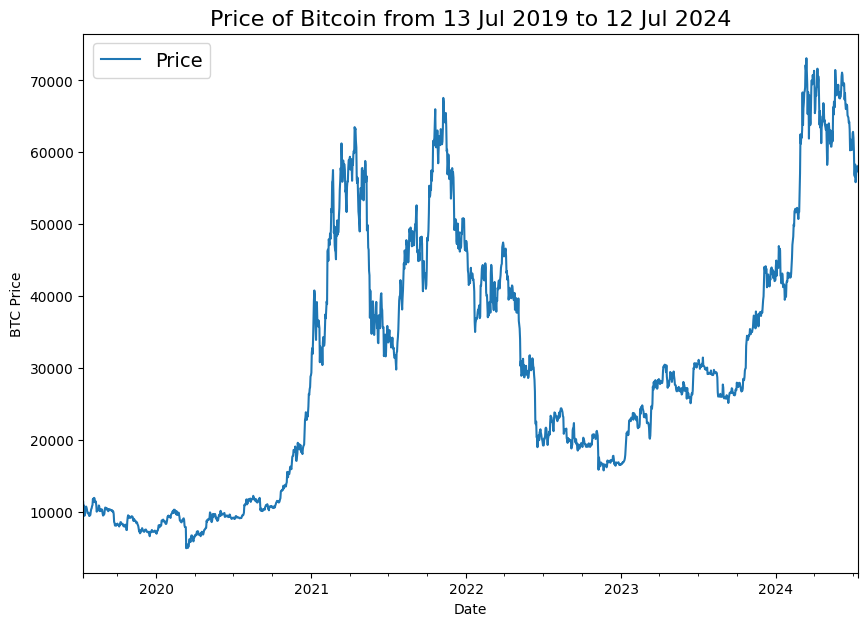

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 13 Jul 2019 to 12 Jul 2024", fontsize=16)
plt.legend(fontsize=14);

## Creating Train and Test Sets

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-07-13T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
        '2019-07-15T00:00:00.000000000', '2019-07-16T00:00:00.000000000',
        '2019-07-17T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
        '2019-07-19T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
        '2019-07-21T00:00:00.000000000', '2019-07-22T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11392.378906, 10256.058594, 10895.089844,  9477.641602,
         9693.802734, 10666.482422, 10530.732422, 10767.139648,
        10599.105469, 10343.106445]))

In [10]:
from sklearn.model_selection import train_test_split

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1462, 366, 1462, 366)

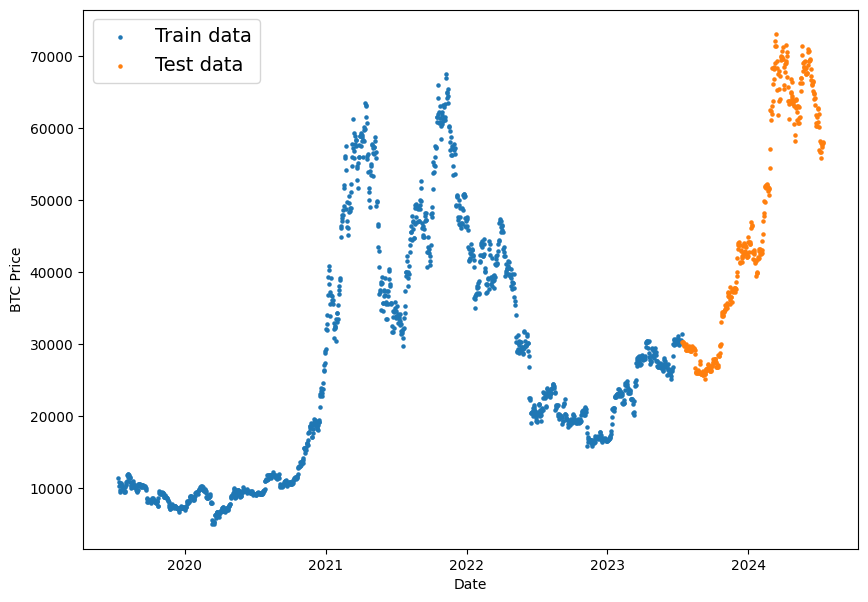

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [12]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

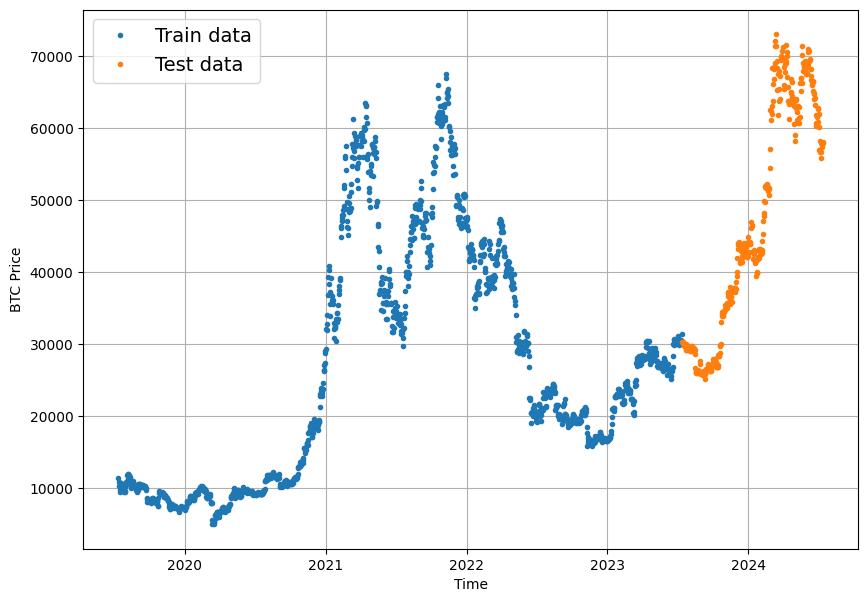

In [13]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# **Modelling**

> **horizon** = number of timesteps to predict into future

> **window** = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

## **Model 0:** Naive Forecast (baseline)

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

An open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

Because of this it will be very hard for us to beat this baseline model.

In [14]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([30334.068359, 30295.806641, 30249.132813, 30145.888672,
        29856.5625  , 29913.923828, 29792.015625, 29908.744141,
        29771.802734, 30084.539063]),
 array([60173.921875, 56977.703125, 56662.375   , 58303.539063,
        55849.109375, 56705.097656, 58009.226563, 57742.496094,
        57344.914063, 57899.464844]))

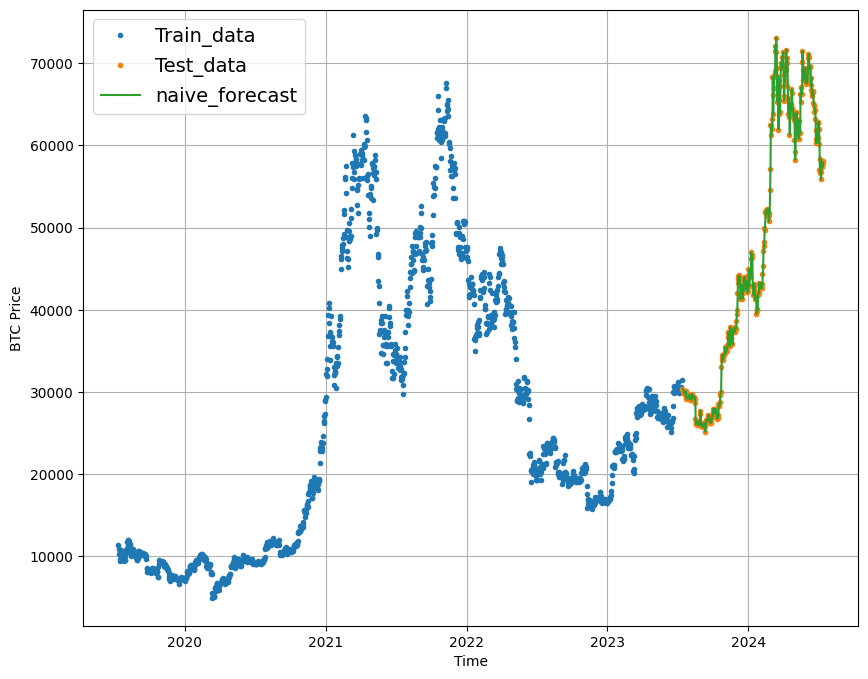

In [15]:
# Plotting baseline
plt.figure(figsize = (10,8))
plot_time_series(timesteps = X_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = "-", label="naive_forecast")

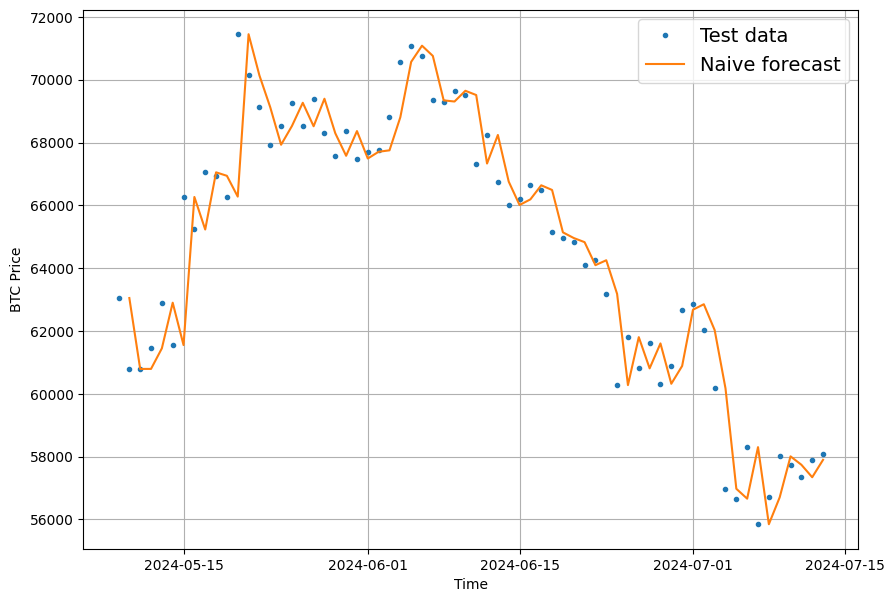

In [18]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

We can observe that out naive forecast comes slightly aster the test data. This is because the naive forecast uses the previous timestep value to predict the next timestep value.

### Evaluation

 Mean Absolute Scaled Error (MASE) is a measure for determining the effectiveness of forecasts generated through an algorithm by comparing the predictions with the output of a naïve forecasting approach.

 MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.

In [22]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true,y_pred))
  mae_naive_no_seasonality = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_seasonality

In [23]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 863.43085,
 'mse': 1813633.2,
 'rmse': 1346.712,
 'mape': 1.6961375,
 'mase': 54.139793}

### Data Preprocessing

To use the data for our supervised task using Dense and Conv etc.. layers, we need to convert the data in windows => Windowing

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


#### Creating a funtion to make windows utilizing our data

In [32]:
# Create function to view NumPy arrays as windows
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # minus 1 to account for 0 indexing
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # Indexing on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [33]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1821, 1821)

In [34]:
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [11392.378906 10256.058594 10895.089844  9477.641602  9693.802734
 10666.482422 10530.732422] -> Label: [10767.139648]
Window: [10256.058594 10895.089844  9477.641602  9693.802734 10666.482422
 10530.732422 10767.139648] -> Label: [10599.105469]
Window: [10895.089844  9477.641602  9693.802734 10666.482422 10530.732422
 10767.139648 10599.105469] -> Label: [10343.106445]
Window: [ 9477.641602  9693.802734 10666.482422 10530.732422 10767.139648
 10599.105469 10343.106445] -> Label: [9900.767578]
Window: [ 9693.802734 10666.482422 10530.732422 10767.139648 10599.105469
 10343.106445  9900.767578] -> Label: [9811.925781]


In [36]:
# View the last 3 windows/labels
for i in range(5):
  print(f"Window: {full_windows[i-5]} -> Label: {full_labels[i-5]}")

Window: [62029.015625 60173.921875 56977.703125 56662.375    58303.539063
 55849.109375 56705.097656] -> Label: [58009.226563]
Window: [60173.921875 56977.703125 56662.375    58303.539063 55849.109375
 56705.097656 58009.226563] -> Label: [57742.496094]
Window: [56977.703125 56662.375    58303.539063 55849.109375 56705.097656
 58009.226563 57742.496094] -> Label: [57344.914063]
Window: [56662.375    58303.539063 55849.109375 56705.097656 58009.226563
 57742.496094 57344.914063] -> Label: [57899.464844]
Window: [58303.539063 55849.109375 56705.097656 58009.226563 57742.496094
 57344.914063 57899.464844] -> Label: [58087.300781]


Similarly can be implemented using `tf.keras.preprocessing.timeseries_dataset_from_array()`.

It returns data in form of tf.data.Dataset instance => faster processing

### Turning windows into training and test sets

In [37]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [39]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1456, 365, 1456, 365)

In [40]:
train_windows[:5], train_labels[:5]

(array([[11392.378906, 10256.058594, 10895.089844,  9477.641602,
          9693.802734, 10666.482422, 10530.732422],
        [10256.058594, 10895.089844,  9477.641602,  9693.802734,
         10666.482422, 10530.732422, 10767.139648],
        [10895.089844,  9477.641602,  9693.802734, 10666.482422,
         10530.732422, 10767.139648, 10599.105469],
        [ 9477.641602,  9693.802734, 10666.482422, 10530.732422,
         10767.139648, 10599.105469, 10343.106445],
        [ 9693.802734, 10666.482422, 10530.732422, 10767.139648,
         10599.105469, 10343.106445,  9900.767578]]),
 array([[10767.139648],
        [10599.105469],
        [10343.106445],
        [ 9900.767578],
        [ 9811.925781]]))

### Setting up Model Checkpoint

In [41]:
import os
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)


## **Model 1:** Dense Model (window = 7, horizon = 1)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(126, activation = "relu"),
    layers.Dense(HORIZON, activation = "linear") # linear is same as having no activation
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [44]:
model_1.fit(x= train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
12/12 [==============================] - 2s 88ms/step - loss: 4199.4033 - mae: 4199.4033 - val_loss: 3190.7815 - val_mae: 3190.7815
Epoch 2/100
12/12 [==============================] - 1s 45ms/step - loss: 1721.8156 - mae: 1721.8156 - val_loss: 1862.8774 - val_mae: 1862.8774
Epoch 3/100
12/12 [==============================] - 1s 50ms/step - loss: 1532.5400 - mae: 1532.5400 - val_loss: 1727.9861 - val_mae: 1727.9861
Epoch 4/100
12/12 [==============================] - 1s 50ms/step - loss: 1394.0748 - mae: 1394.0748 - val_loss: 1680.3572 - val_mae: 1680.3572
Epoch 5/100
12/12 [==============================] - 1s 48ms/step - loss: 1381.5675 - mae: 1381.5675 - val_loss: 1662.0894 - val_mae: 1662.0894
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 1355.9363 - mae: 1355.9363 - val_loss: 1690.7644 - val_mae: 1690.7644
Epoch 7/100
12/12 [==============================] - 1s 45ms/step - loss: 1338.7450 - mae: 1338.7450 - val_loss: 1641.0658 - val_mae: 164

In [45]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 4ms/step - loss: 903.5283 - mae: 903.5283


[903.5283203125, 903.5283203125]

In [46]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

12/12 [==============================] - 0s 5ms/step - loss: 869.7598 - mae: 869.7598


[869.7598266601562, 869.7598266601562]

So our best model_1 is off by 870 MAE

### Making forecast with model (on test data)